In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
from sklearn import linear_model as lm
from scipy.stats import t

# Exercice 1

On s'intéresse au dataset INVESTMENT.

## Q1
On charge directement le dataset à l'aide de la librairie pandas.

In [3]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", sep = r"\s+")

In [4]:
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


<IPython.core.display.Javascript object>


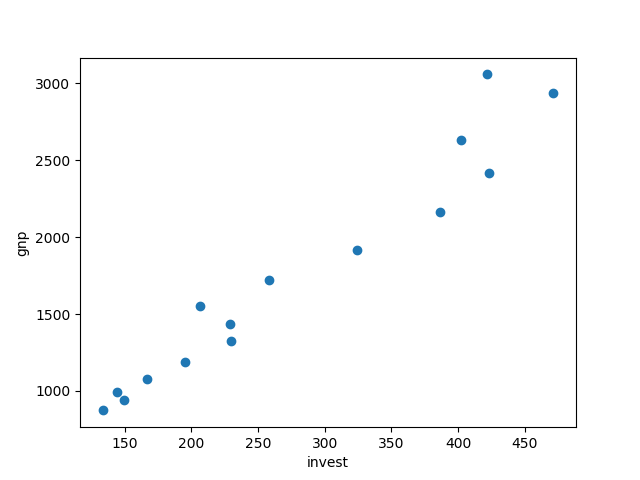

In [88]:
plt.scatter(data[["invest"]], data.gnp)
plt.xlabel("invest")
plt.ylabel("gnp")
plt.show()

## Q2 
On définit deux nouvelles series correspondant à l'échelle logarithmique.


In [7]:
data["log_invest"] = data.invest.apply(m.log)
data["log_gnp"] = data.gnp.apply(m.log)

In [8]:
data.head()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
0,1968,873.4,133.3,82.54,5.16,4.892602,6.772394
1,1969,944.0,149.3,86.79,5.87,5.005958,6.850126
2,1970,992.7,144.2,91.45,5.95,4.971201,6.900429
3,1971,1077.6,166.4,96.01,4.88,5.114395,6.982492
4,1972,1185.9,195.0,100.00,4.50,5.273000,7.078257


In [9]:
data.describe()

,year,gnp,invest,cpi,interest,log_invest,log_gnp
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1975.000000,1748.646667,276.006667,131.401333,7.452667,5.532761,7.383521
std,4.472136,738.145808,117.582691,40.286606,2.812245,0.437486,0.422801
min,1968.000000,873.400000,133.300000,82.540000,4.500000,4.892602,6.772394
25%,1971.500000,1131.750000,180.700000,98.005000,5.480000,5.193697,7.030374
50%,1975.000000,1549.200000,229.800000,125.790000,6.250000,5.437209,7.345494
75%,1978.500000,2290.850000,394.450000,156.920000,9.055000,5.977294,7.735140
max,1982.000000,3057.500000,471.500000,207.230000,13.420000,6.155919,8.025353


<IPython.core.display.Javascript object>


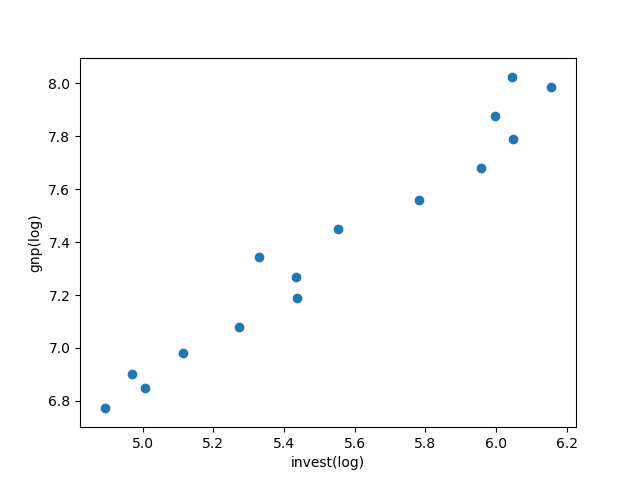

In [86]:
plt.scatter(data[["log_invest"]], data.log_gnp)
plt.xlabel("invest(log)")
plt.ylabel("gnp(log)")
plt.show()

## Q3

Dans un premier temps on s'intéresse à la regresion de Investment sur GNP. Pour cela on se place en échelle logarithmique pour prendre en compte les différences d'échelles.

In [12]:
n = len(data)

In [13]:
y = data.log_invest.values
x = data.log_gnp.values

On a montré dans l'exercice 12 que: 

$$\hat{\beta_0} = \bar{Y_n} - \hat{\beta_1} $$

$$\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \hat{x_n})(Y_i-\bar{Y_n})}{ \sum_{i=1}^{n}(x_i - \hat{x_n})²}$$

In [14]:
beta1_chap = sum((x-x.mean())*(y-y.mean()))/sum((x-x.mean())**2)

In [15]:
beta0_chap = y.mean() - beta1_chap*x.mean()

In [16]:
print("L'intercept vaut {:.3f} et la pente est {:.3f}".format(beta0_chap, beta1_chap))

L'intercept vaut -1.964 et la pente est 1.015


On a de plus:
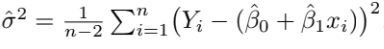

In [17]:
sigma_chap_2 = (sum((y-(beta0_chap+beta1_chap*x))**2))/(n-2)

In [119]:
print("L'estimateur de la variance vaut {:.2e}".format(sigma_chap_2))

L'estimateur de la variance vaut 7.68e-03


On peut maintenant calculer:
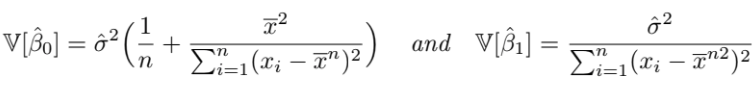

In [19]:
var_beta0_chap = sigma_chap_2*(1/n+(x.mean()**2)/sum((x-x.mean())**2))

In [20]:
var_beta1_chap = sigma_chap_2/sum((x-x.mean())**2)

In [118]:
print("Les écarts types des estimateurs de l'intercept et \
de la pente sont respectivement {:.2e} et {:.2e}".format(m.sqrt(var_beta0_chap),m.sqrt(var_beta1_chap)))

Les écarts types des estimateurs de l'intercept et de la pente sont respectivement 4.10e-01 et 5.54e-02


In [21]:
y_chap = beta0_chap + beta1_chap*x

In [22]:
R_2  = 1 - np.linalg.norm(y-y_chap)**2/np.linalg.norm(y-y.mean())**2

In [122]:
"Le coefficient de détermination vaut lui {:.3f}".format(R_2)

'Le coefficient de détermination vaut lui 0.963'

# Q4

On teste l'hypothèse $H0: \beta_1=0$

In [24]:
T_stat_pente = beta1_chap/m.sqrt(var_beta1_chap)

In [126]:
print("La t-statistique vaut {:.2f}".format(T_stat_pente))

La t-statistique vaut 18.33


In [138]:
cv = t.ppf(1.0 - 0.05, n-2) # alpha = 0.05 , et degreef =15-2
print("Le quantile d'une loi de student à 13 degrés de liberté vaut {:.2f} pour un alpha de 0.05.\nOn en déduit que la t-statistique \
n'appartient à l'intervalle de confiance, donc il est fortement probable que la pente soit significative. ".format(cv))

Le quantile d'une loi de student à 13 degrés de liberté vaut 1.77 pour un alpha de 0.05.
On en déduit que la t-statistique n'appartient à l'intervalle de confiance, donc il est fortement probable que la pente soit significative. 


In [141]:
pval= (1 - t.cdf(abs(T_stat_pente), n-2)) * 2   # t_stat = c'est la formule dans le pol
print("La p-value est {:.2e}".format(pval))

La p-value est 1.14e-10


# Q5

#  Continuer la mise en forme

In [27]:
x_pred = m.log(1000)

In [28]:
y_pred = beta0_chap + beta1_chap * x_pred

In [29]:
m.exp(y_pred)

155.97942793105494

In [31]:
borne_inf = y_pred - cv*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [32]:
borne_sup = y_pred + cv*m.sqrt(1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [33]:
borne_inf, borne_sup

(5.002835144984054, 5.096613107649549)

In [34]:
borne_inf2 = y_pred - cv*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [35]:
borne_sup2 = y_pred + cv*m.sqrt(1+1/n+((x_pred-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2)

In [36]:
borne_inf2, borne_sup2

(4.922475338645675, 5.176972913987928)

# Q6

In [37]:
y_pred

5.049724126316802

In [38]:
plot1 = plt.figure(1,figsize=(16,8))
plt.scatter( data.log_gnp,data[["log_invest"]])
x_ = np.linspace(data.log_gnp.min(), data.log_gnp.max())
y_ = [beta0_chap+x*beta1_chap for x in x_]
y_sup = [y+1.350*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf = [y-1.350*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_sup_ = [y+1.350*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf_ = [y-1.350*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
plt.plot(x_,y_sup,c="r")
plt.plot(x_,y_inf,c="r")
plt.plot(x_,y_sup_,c="green")
plt.plot(x_,y_inf_,c="green")
plt.plot(x_,y_)
plt.show()

# Q7

In [36]:
lin_model = lm.LinearRegression()

In [37]:
lin_model.fit(data[["log_gnp"]],data["log_invest"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
lin_model.coef_

array([1.0152814])

In [39]:
lin_model.intercept_

-1.9635913352301815

In [40]:
lin_model.predict([[x_pred]])

array([5.04972413])

In [41]:
y_pred

5.049724126316802

In [42]:
lin_model.score(data[["log_gnp"]],data["log_invest"])

0.9627572956057855

In [43]:
R_2

0.9627572956057855

# Q8

In [40]:
%matplotlib notebook

<IPython.core.display.Javascript object>


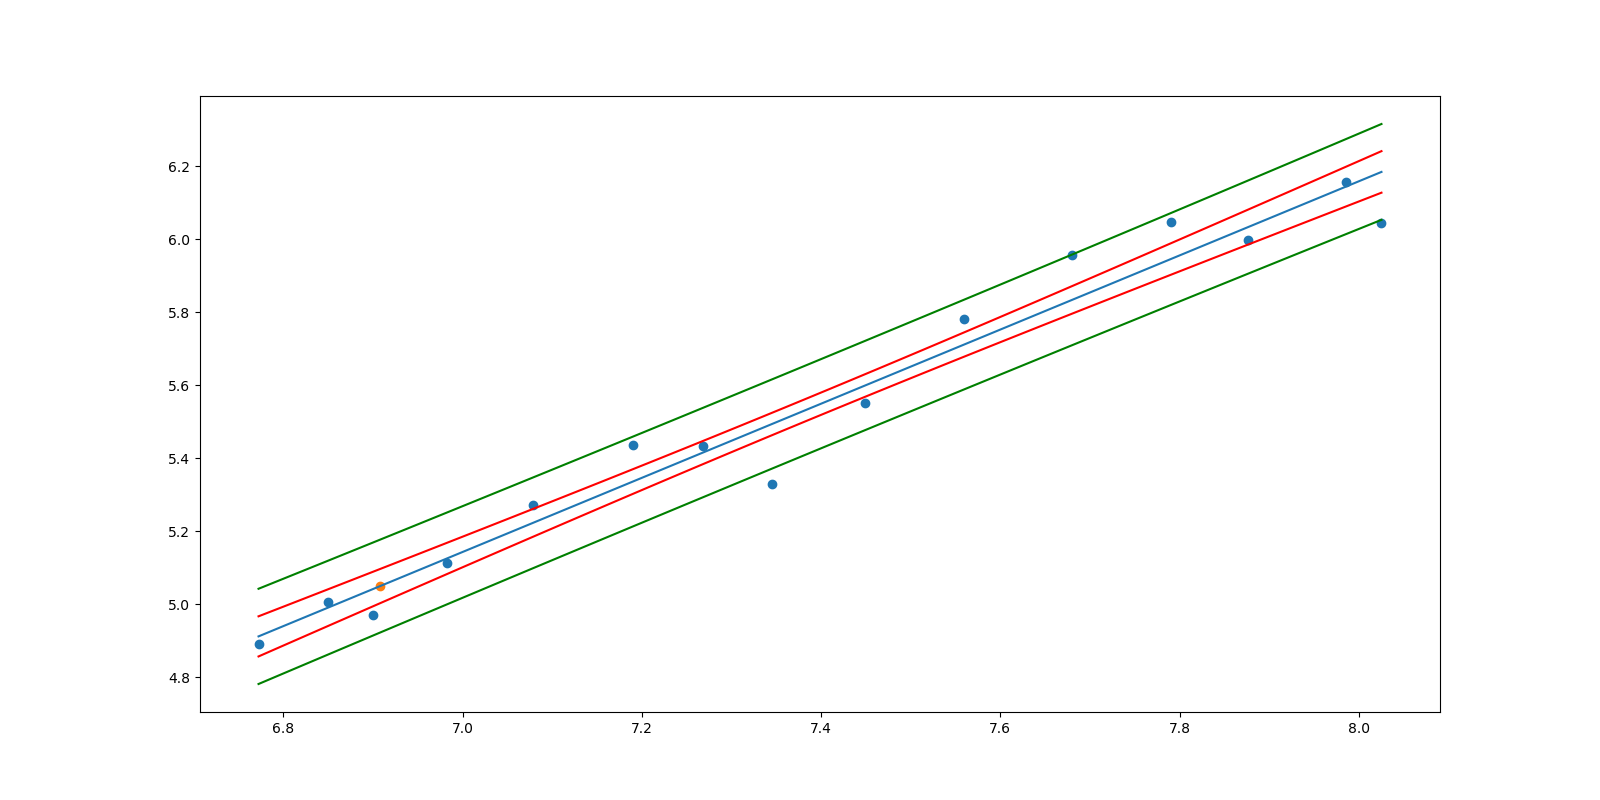

In [41]:
plot = plt.figure(1,figsize=(16,8))
plt.scatter( data.log_gnp,data[["log_invest"]])
plt.scatter(x_pred,y_pred)
y_sup = [y+1.350*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf = [y-1.350*m.sqrt(1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_sup_ = [y+1.350*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
y_inf_ = [y-1.350*m.sqrt(1+1/n+((xi-x.mean())**2)/sum((x-x.mean())**2))*m.sqrt(sigma_chap_2) for (xi,y) in zip(x_,y_)]
plt.plot(x_,y_sup,c="r")
plt.plot(x_,y_inf,c="r")
plt.plot(x_,y_sup_,c="green")
plt.plot(x_,y_inf_,c="green")
plt.plot(x_,y_)
plt.show()

# Q9

In [42]:
X = data[["log_gnp","interest"]].values

In [43]:
X = np.concatenate((np.ones_like(data.interest).reshape(-1,1),X), axis = 1)

In [44]:
gram_inv = np.linalg.inv(np.dot(X.T,X))

In [45]:
gram_inv

array([[ 5.35582897e+01, -8.20827474e+00,  9.54604525e-01],
       [-8.20827474e+00,  1.27148125e+00, -1.58296934e-01],
       [ 9.54604525e-01, -1.58296934e-01,  2.87392805e-02]])

# Q10

In [46]:
theta_chap = np.dot(gram_inv,np.dot(X.T,y))

In [47]:
theta_chap

array([-2.18045473,  1.05124269, -0.00652888])

In [48]:
ychap = np.dot(X,theta_chap)

remplacer par rg(m)

In [49]:
s2 = 1/(len(data)-3)*np.linalg.norm(y-ychap)**2

In [50]:
s2

0.00819243295551977

In [51]:
var_theta_chap  = [s2*gram_inv[i,i] for i in range(3)]

In [52]:
var_theta_chap

[0.43877269724127277, 0.010416524891898793, 0.00023544462909531338]

In [53]:
ecart_type = [m.sqrt(v) for v in var_theta_chap]

In [54]:
ecart_type

[0.6623991977963687, 0.10206137806192307, 0.015344205065604194]

In [55]:
R2 = 1-(np.linalg.norm(y-ychap)/np.linalg.norm(y-y.mean()))**2

In [56]:
R2

0.9633108306726245

On test $\theta_i = 0$

In [57]:
T_stat = theta_chap/ecart_type

In [58]:
T_stat

array([-3.29175327, 10.30010285, -0.4254948 ])

In [59]:
cv = t.ppf(1.0 - 0.1, 12) # alpha = 0.05 , et degreef =15-2

In [60]:
cv

1.3562173340231976

In [61]:
pvals= (1 - t.cdf(abs(T_stat), 13)) * 2   # t_stat = c'est la formule dans le pol


In [62]:
pvals

array([5.83964494e-03, 1.27535023e-07, 6.77435307e-01])

On ne peut pas rejeter $H0 : \theta = 0$

# Q11

In [63]:
x_new = np.array([1, m.log(1000),10])

In [64]:
y_new = np.dot(x_new.T, theta_chap)

In [65]:
y_new

5.0159837304835255

In [66]:
critical_value = t.ppf(1.0 - 0.01, 12) # alpha = 0.05 , et degreef =15-2

In [67]:
BI = y_new - critical_value*m.sqrt(1+x_new.T.dot(gram_inv).dot(x_new))*m.sqrt(s2)

In [68]:
BS = y_new + critical_value*m.sqrt(1+x_new.T.dot(gram_inv).dot(x_new))*m.sqrt(s2)

In [69]:
[float("{:.2f}".format(BI)),float("{:.2f}".format(BS))]

[4.68, 5.35]

In [70]:
list(map(lambda x :float("{:.2f}".format(x)),[BI,BS]))

[4.68, 5.35]

In [71]:
PI = y_new - critical_value*m.sqrt(x_new.T.dot(gram_inv).dot(x_new))*m.sqrt(s2)

In [72]:
PS = y_new + critical_value*m.sqrt(x_new.T.dot(gram_inv).dot(x_new))*m.sqrt(s2)

# Q12

In [73]:
x0 = np.linspace(1,1)
x1 = np.linspace(data.log_gnp.min(), data.log_gnp.max())
x2 = np.linspace(data.interest.min(), data.interest.max())

In [74]:
X_new = [np.array([x0[i],x1[i],x2[i]]) for i in range(50)]
Y_pred = [np.dot(x.T, theta_chap) for x in X_new]

In [75]:
ZZ = [[critical_value*m.sqrt(1+np.array([1,xx_,yy_]).T.dot(gram_inv).dot(np.array([1,xx_,yy_])))*m.sqrt(s2)for xx_ in x1] for yy_ in x2]

In [76]:
np.array(ZZ).shape

(50, 50)

In [77]:
ZZ=np.reshape(ZZ,(50,50))

In [78]:
xx,yy = np.meshgrid(x1,x2)

In [79]:
theta_chap

array([-2.18045473,  1.05124269, -0.00652888])

In [83]:
zz.max()

NameError: name 'zz' is not defined

In [ ]:
zz.shape

In [80]:
zz = theta_chap[0]+theta_chap[1]*xx+theta_chap[2]*yy

In [87]:
zs = critical_value*m.sqrt(1+.T.dot(gram_inv).dot(x_new))*m.sqrt(s2)

SyntaxError: invalid syntax (<ipython-input-87-e41c29c1c8a3>, line 1)

In [81]:
%matplotlib notebook

<IPython.core.display.Javascript object>


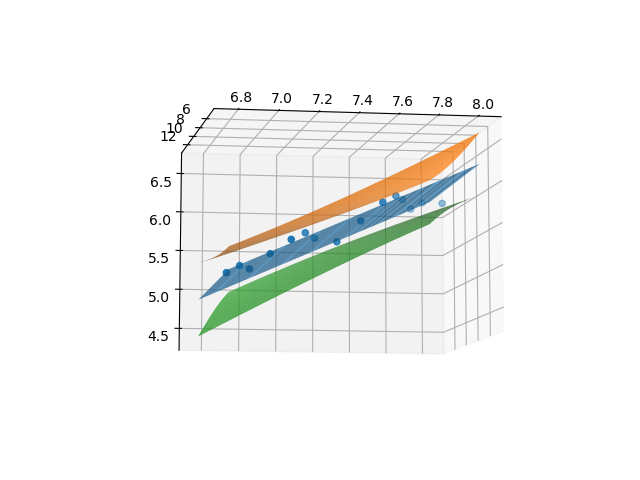

In [83]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data.log_gnp, data.interest, data.log_invest)
ax.plot_surface(xx,yy,zz)
ax.plot_surface(xx,yy,np.array(ZZ)+zz)
ax.plot_surface(xx,yy,-np.array(ZZ)+zz)

In [ ]:
# animation.FuncAnimation(fig)

In [ ]:
import matplotlib.animation as animation


In [ ]:
import matplotlib

In [ ]:
# import ipympl